# Table of Contents
* [1. Introduction](#1.-Introduction)
* [2. Quick exploration of the given data](#2.-Quick-exploration-of-the-given-data)
	* [2.1 Loading the data](#2.1-Loading-the-data)
	* [2.2 Data basic description](#2.2-Data-basic-description)
* [3. Features completion](#3.-Features-completion)
	* [3.1 Age](#3.1-Age)
	* [3.2 Cabin](#3.2-Cabin)
		* [3.2.1 Cabin from name?](#3.2.1-Cabin-from-name?)
		* [3.2.2 Cabin from Ticket?](#3.2.2-Cabin-from-Ticket?)
	* [3.3 Embarked](#3.3-Embarked)
	* [3.4 Fare](#3.4-Fare)
* [4. Feature detailed analysis and engineering](#4.-Feature-detailed-analysis-and-engineering)
	* [4.1 Quantitative features](#4.1-Quantitative-features)
		* [4.1.1 Age](#4.1.1-Age)
		* [4.1.2 Fare](#4.1.2-Fare)
		* [4.1.3 SibSp (Sibblings + Spouses) and Parch (Parents + children)](#4.1.3-SibSp-%28Sibblings-+-Spouses%29-and-Parch-%28Parents-+-children%29)
	* [4.2 Categorical features](#4.2-Categorical-features)
		* [4.2.1 Sex](#4.2.1-Sex)
		* [4.2.2 Embarked](#4.2.2-Embarked)
		* [4.2.3 Pclass](#4.2.3-Pclass)
	* [4.3 Feature engineering with non-classifiable](#4.3-Feature-engineering-with-non-classifiable)
		* [4.3.1 Cabin_letter](#4.3.1-Cabin_letter)
		* [4.3.2 Ticket](#4.3.2-Ticket)
			* [4.3.2.1 Sharing the Ticket](#4.3.2.1-Sharing-the-Ticket)
			* [4.3.2.2 Head of family/friends from Ticket](#4.3.2.2-Head-of-family/friends-from-Ticket)
		* [4.3.3 Name](#4.3.3-Name)
			* [4.3.3.1 Language from Name](#4.3.3.1-Language-from-Name)
			* [4.3.3.2 Common surname](#4.3.3.2-Common-surname)
			* [4.3.3.3 Title from Name](#4.3.3.3-Title-from-Name)
	* [4.4 Exploring which features are really useful](#4.4-Exploring-which-features-are-really-useful)
* [5 Training a ML model](#5-Training-a-ML-model)
* [6 Prediction](#6-Prediction)


# 1. Introduction

In this notebook we'll work with [the Titanic competition on Kaggle](https://www.kaggle.com/c/titanic).

First we will explore the given data and complete missing data. Then we will create new features based on the data provided, which is called __feature engineering__. Finally we will predict test cases using __Random Forest__.

# 2. Quick exploration of the given data

Before starting we need to load the data and explore it a bit to understand its meaning.

## 2.1 Loading the data

In [1]:
# import the usual libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We will load both train and test data, and concat them to work on both at the same time. Just notice that the test data has the _Survived_ feature missing.

In [2]:
train_df = pd.read_csv('../input/train.csv', index_col='PassengerId')
test_df = pd.read_csv('../input/test.csv', index_col='PassengerId')
df = pd.concat([train_df, test_df])

df.sample(10)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
832,0.83,NaN,S,18.7500,"Richards, Master. George Sibley",1,2,male,1,1.0,29106
956,13.00,B57 B59 B63 B66,C,262.3750,"Ryerson, Master. John Borie",2,1,male,2,NaN,PC 17608
408,3.00,NaN,S,18.7500,"Richards, Master. William Rowe",1,2,male,1,1.0,29106
972,6.00,NaN,C,15.2458,"Boulos, Master. Akar",1,3,male,1,NaN,2678
628,21.00,D9,S,77.9583,"Longley, Miss. Gretchen Fiske",0,1,female,0,1.0,13502
934,41.00,NaN,S,7.8500,"Goldsmith, Mr. Nathan",0,3,male,0,NaN,SOTON/O.Q. 3101263
610,40.00,C125,S,153.4625,"Shutes, Miss. Elizabeth W",0,1,female,0,1.0,PC 17582
709,22.00,NaN,S,151.5500,"Cleaver, Miss. Alice",0,1,female,0,1.0,113781
759,34.00,NaN,S,8.0500,"Theobald, Mr. Thomas Leonard",0,3,male,0,0.0,363294


You can refer to [its data dictionary](https://www.kaggle.com/c/titanic/data) to know more about these features.

## 2.2 Data basic description

Using pandas __.describe()__ method we can see general statistics for each feature.

In [3]:
# Have a look at other numerical features
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


Joining train and test sets there are 1309 people. There are 891 people in the train set (the ones with Survived data), but only 38% survived. The average age is 29.8 years. The fare has a wide range of prices, from free to 512. Around 38% travelled without parents nor children. The most common Pclass is 3rd. Almost half of the people travelled without sibblings nor spouse.

In [4]:
# Basic statistics for non-numerical cases
df.describe(include=['O'])

,Cabin,Embarked,Name,Sex,Ticket
count,295,1307,1309,1309,1309
unique,186,3,1307,2,929
top,C23 C25 C27,S,"Kelly, Mr. James",male,CA. 2343
freq,6,914,2,843,11


There is only information about 295 people with cabin. Most people embarked at "S", which is Southampton, UK. And there are more male than female. Finally, some people shared tickets, being 11 the most remarkable case.

# 3. Features completion

Let's first see which features need completion.

In [5]:
df.isnull().sum()

Age          263
Cabin       1014
Embarked       2
Fare           1
Name           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived     418
Ticket         0
dtype: int64

There are 263 passengers with missing Age and a lot without Cabin. Also we have 2 missing cases in Embarked and 1 in Fare.

## 3.1 Age

Firstly there are some ages that, according with the data dictionary, are actually estimated: those that come in the form xx.5. So let's mark them, and also the ones we will be estimating too.

In [6]:
is_estimated_or_null = lambda x: pd.isnull(x) or (x>1 and divmod(x, 1)[1] == 0.5)
df['estimated_age'] = df.Age.apply(lambda age: 1 if is_estimated_or_null(age) else 0)

In order to estimate the missing ages we could guess that young people were not labeled as 1st class. The age can depend on the sex, and perhaps even on the embarkation port.

In [7]:
# Let's verify the guess grouping
age_grouped = df[['Pclass','Sex','Embarked','Age']].groupby(['Pclass','Sex','Embarked']).median()
age_grouped

Age
Pclass Sex    Embarked       
1      female C         38.00
              Q         35.00
              S         34.00
       male   C         39.00
              Q         44.00
              S         42.00
2      female C         23.00
              Q         30.00
              S         28.00
       male   C         29.00
              Q         59.00
              S         29.00
3      female C         15.00
              Q         22.00
              S         22.00
       male   C         24.25
              Q         25.00
              S         25.00

Given that the guess looks quite correct, let's complete the missing Age cases just depending on passenger's class.

In [8]:
real_age = lambda row: row.Age if not pd.isnull(row.Age) else age_grouped.loc[row.Pclass].loc[row.Sex].loc[row.Embarked].Age
df['Age'] = df[['Pclass','Sex','Embarked','Age']].apply(real_age, axis=1)

## 3.2 Cabin 

There are a lot of missing data in this feature. We could start grouping cabins by its initial letter, which is its vessel's section or deck.

In [9]:
df['cabin_letter'] = df.Cabin.apply(lambda c: c[0] if not pd.isnull(c) else 'N') # N=none

df.sample(5)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,estimated_age,cabin_letter
PassengerId,,,,,,,,,,,,,
322,27.0,NaN,S,7.8958,"Danoff, Mr. Yoto",0,3,male,0,0.0,349219,0,N
456,29.0,NaN,C,7.8958,"Jalsevac, Mr. Ivan",0,3,male,0,1.0,349240,0,N
205,18.0,NaN,S,8.0500,"Cohen, Mr. Gurshon ""Gus""",0,3,male,0,1.0,A/5 3540,0,N
955,22.0,NaN,Q,7.7250,"Bradley, Miss. Bridget Delia",0,3,female,0,NaN,334914,0,N
1307,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,3,male,0,NaN,SOTON/O.Q. 3101262,1,N


In [10]:
# Grouping by cabin letter should show us some insights...
survival_ratio = df[['cabin_letter','Pclass','Survived']].groupby(['cabin_letter']).mean()
people_count = df[['cabin_letter','Name']].groupby(['cabin_letter']).count().rename(columns={'Name': 'passenger_count'})

pd.concat([survival_ratio,people_count], axis=1)

,Pclass,Survived,passenger_count
cabin_letter,,,
A,1.000000,0.466667,22
B,1.000000,0.744681,65
C,1.000000,0.593220,94
D,1.130435,0.757576,46
E,1.243902,0.750000,41
F,2.380952,0.615385,21
G,3.000000,0.500000,5
N,2.617357,0.299854,1014
T,1.000000,0.000000,1


It is clear that different cabins have different survival expectation, due to the situation in the ship. Apparently letters A, B, C, and T are related to 1st class; same for G, related to 3rd class. Other letters have people in different classes.

As the missing data comes from people in all classes, we can't assign easily neither cabin nor cabin letter.

### 3.2.1 Cabin from name?

If you have a look at the names provided, they are in the form "Surname, Title. Name", and in the cases of a wife "Man_surname, Man_title. Man_name (Woman_name Woman_surname)". We could use this information to find people with same family names and assign the same cabin.

In [11]:
df['surname'] = df.Name.apply(lambda n: n.split(',')[0])
df.sample(10)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,estimated_age,cabin_letter,surname
PassengerId,,,,,,,,,,,,,,
398,46.0,NaN,S,26.0000,"McKane, Mr. Peter David",0,2,male,0,0.0,28403,0,N,McKane
242,22.0,NaN,Q,15.5000,"Murphy, Miss. Katherine ""Kate""",0,3,female,1,1.0,367230,1,N,Murphy
737,48.0,NaN,S,34.3750,"Ford, Mrs. Edward (Margaret Ann Watson)",3,3,female,1,0.0,W./C. 6608,0,N,Ford
247,25.0,NaN,S,7.7750,"Lindahl, Miss. Agda Thorilda Viktoria",0,3,female,0,0.0,347071,0,N,Lindahl
836,39.0,E49,C,83.1583,"Compton, Miss. Sara Rebecca",1,1,female,1,1.0,PC 17756,0,E,Compton
316,26.0,NaN,S,7.8542,"Nilsson, Miss. Helmina Josefina",0,3,female,0,1.0,347470,0,N,Nilsson
698,22.0,NaN,Q,7.7333,"Mullens, Miss. Katherine ""Katie""",0,3,female,0,1.0,35852,1,N,Mullens
1003,22.0,NaN,Q,7.7792,"Shine, Miss. Ellen Natalia",0,3,female,0,NaN,330968,1,N,Shine
1190,30.0,NaN,S,45.5000,"Loring, Mr. Joseph Holland",0,1,male,0,NaN,113801,0,N,Loring


In [12]:
#Group by surname and class, in order to find people that could be a family
surnames = df[['surname','Cabin','Pclass','Name']].groupby(['surname','Pclass']).count()
surnames.head()

,,Cabin,Name
surname,Pclass,,
Abbing,3,0,1
Abbott,3,0,3
Abelseth,3,1,2
Abelson,2,0,2
Abrahamsson,3,0,1


In [13]:
# Find cases with more people than assigned cabin
missing = surnames[(surnames.Cabin>0) & (surnames.Cabin<surnames.Name)] # Notice the element-wise binary logical operator '&'
missing.rename(columns={'Name': 'passenger_count'})

,,Cabin,passenger_count
surname,Pclass,,
Abelseth,3,1,2
Brown,2,1,4
Frauenthal,1,1,3
Hoyt,1,2,3
Keane,2,1,2
Peter,3,1,3
Wick,1,1,3


We found just 7 cases of (probably) families with missing cabins. Let's have a look at the Brown...

In [14]:
df[df.surname=='Brown']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,estimated_age,cabin_letter,surname
PassengerId,,,,,,,,,,,,,,
195,44.0,B4,C,27.7208,"Brown, Mrs. James Joseph (Margaret Tobin)",0,1,female,0,1.0,PC 17610,0,B,Brown
346,24.0,F33,S,13.0000,"Brown, Miss. Amelia ""Mildred""",0,2,female,0,1.0,248733,0,F,Brown
671,40.0,NaN,S,39.0000,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",1,2,female,1,1.0,29750,0,N,Brown
685,60.0,NaN,S,39.0000,"Brown, Mr. Thomas William Solomon",1,2,male,1,0.0,29750,0,N,Brown
1067,15.0,NaN,S,39.0000,"Brown, Miss. Edith Eileen",2,2,female,0,NaN,29750,0,N,Brown
1248,59.0,C101,S,51.4792,"Brown, Mrs. John Murray (Caroline Lane Lamson)",0,1,female,2,NaN,11769,0,C,Brown


In this case we can't assign any cabin to the passengers 671, 685 and 1067 (the ones without cabin) because they are actually an independent family, as they have the same ticket number and moreover Parch and SibSp numbers made us to suspect so.

Let's try with the Hoyt...

In [15]:
df[df.surname=='Hoyt']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,estimated_age,cabin_letter,surname
PassengerId,,,,,,,,,,,,,,
225,38.0,C93,S,90.0000,"Hoyt, Mr. Frederick Maxfield",0,1,male,1,1.0,19943,0,C,Hoyt
487,35.0,C93,S,90.0000,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",0,1,female,1,1.0,19943,0,C,Hoyt
794,39.0,NaN,C,30.6958,"Hoyt, Mr. William Fisher",0,1,male,0,0.0,PC 17600,1,N,Hoyt


In this case too we can't assign any cabin as the third passenger is clearly not related with the couple.

We have seen 2 cases but didn't found any useful way to get the cabin from the surname, a pity.

### 3.2.2 Cabin from Ticket?

We could find people without cabin set, but with the ticket id shared with other people who have cabin assigned.

In [16]:
tickets_grouped = df[['Ticket','Cabin','Name']].groupby('Ticket').count()

# Filter: With at least a Cabin, with at least 2 people, and more people than cabins
candidate_tickets = tickets_grouped[(tickets_grouped['Cabin']>=1) & (tickets_grouped['Name']>=2) & (tickets_grouped['Cabin']<tickets_grouped['Name'])]
candidate_tickets

,Cabin,Name
Ticket,,
113781,4,6
17421,3,4
19877,2,3
24160,3,4
2668,1,3
36928,2,4
PC 17608,6,7
PC 17755,3,4
PC 17757,3,5


Nice, we got some candidates! Let's verify with one of them.

In [17]:
df[df.Ticket=='113781']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,estimated_age,cabin_letter,surname
PassengerId,,,,,,,,,,,,,,
298,2.00,C22 C26,S,151.55,"Allison, Miss. Helen Loraine",2,1,female,1,0.0,113781,0,C,Allison
306,0.92,C22 C26,S,151.55,"Allison, Master. Hudson Trevor",2,1,male,1,1.0,113781,0,C,Allison
499,25.00,C22 C26,S,151.55,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",2,1,female,1,0.0,113781,0,C,Allison
709,22.00,NaN,S,151.55,"Cleaver, Miss. Alice",0,1,female,0,1.0,113781,0,N,Cleaver
1033,33.00,NaN,S,151.55,"Daniels, Miss. Sarah",0,1,female,0,NaN,113781,0,N,Daniels
1198,30.00,C22 C26,S,151.55,"Allison, Mr. Hudson Joshua Creighton",2,1,male,1,NaN,113781,0,C,Allison


Great! We can complete some Cabins!

In [18]:
shared_tickets = candidate_tickets.index.tolist()

find_cabin_given_ticket = lambda ticket: df[(df.Ticket==ticket) & (pd.notnull(df.Cabin))].Cabin.values[0]
def assign_cabin(row):
    if pd.isnull(row.Cabin) and row.Ticket in shared_tickets: 
        return find_cabin_given_ticket(row.Ticket) 
    return row.Cabin

df['Cabin'] = df[['Cabin', 'Ticket']].apply(assign_cabin, axis=1)
df['cabin_letter'] = df['Cabin'].apply(lambda c: c[0] if not pd.isnull(c) else 'N') # N=none

df[df.Ticket=='113781']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,estimated_age,cabin_letter,surname
PassengerId,,,,,,,,,,,,,,
298,2.00,C22 C26,S,151.55,"Allison, Miss. Helen Loraine",2,1,female,1,0.0,113781,0,C,Allison
306,0.92,C22 C26,S,151.55,"Allison, Master. Hudson Trevor",2,1,male,1,1.0,113781,0,C,Allison
499,25.00,C22 C26,S,151.55,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",2,1,female,1,0.0,113781,0,C,Allison
709,22.00,C22 C26,S,151.55,"Cleaver, Miss. Alice",0,1,female,0,1.0,113781,0,C,Cleaver
1033,33.00,C22 C26,S,151.55,"Daniels, Miss. Sarah",0,1,female,0,NaN,113781,0,C,Daniels
1198,30.00,C22 C26,S,151.55,"Allison, Mr. Hudson Joshua Creighton",2,1,male,1,NaN,113781,0,C,Allison


In [19]:
df.Cabin.isnull().sum()

998

We started with 1014 passengers without cabin, but at least we completed 16 direct cases.

## 3.3 Embarked

There were 3 ports of embarkation, coded as: C = Cherbourg (France), Q = Queenstown (UK), S = Southampton (UK). Let's see how many passengers embarked in each port.

In [20]:
embarked_count = df[['Embarked','Name']].groupby(by='Embarked').count()
embarked_survived = df[['Embarked','Survived','Pclass']].groupby(by='Embarked').mean()
pd.concat([embarked_count,embarked_survived], axis=1).sort_values(by='Name', ascending=False).rename(columns={'Name': 'passenger_count'})

,passenger_count,Survived,Pclass
Embarked,,,
S,914,0.336957,2.347921
C,270,0.553571,1.851852
Q,123,0.389610,2.894309


Most people embarked at Southampton (914) but we can notice that people that embarked in the continent (C) have more chances of surviving, perhaps due to a higher Pclass.

An easy way to fill in missing values is using "S", as it's by far the most common case: this is called imputation. As there is just 2 missing cases, this solution will be enough.

In [21]:
df['Embarked'].fillna('S', inplace=True)

## 3.4 Fare

As there is only one missing value, so let's explore its case directly:

In [22]:
df[pd.isnull(df.Fare)]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,estimated_age,cabin_letter,surname
PassengerId,,,,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,NaN,3701,1,N,Storey


We can assign a fare given the average fare of similar cases.

In [23]:
estimated_fare = df[(df.Embarked=='S') & (df.Pclass==3) & (df.Sex=='male')].Fare.mean()
df['Fare'].fillna(estimated_fare, inplace=True)

# 4. Feature detailed analysis and engineering

Some quantitative features could be used directly as input of the ML model (expecting there will be some correlation). Other features (categorical and non-classificable ones) will need further process to make them useful.

* **Quantitative**, that is, numbers that are easy to work with
    * Continuous: Age, Fare
    * Discrete: SibSp, Parch


* **Categorical**, that represent categories, and will need some processing
    * Nominal: Embarked, Sex
    * Ordered: Pclass
    
 
* **Non classifiable**, that will need some feature engineering to make them useful
    * Strings: Cabin, Ticket, Name

## 4.1 Quantitative features

### 4.1.1 Age

Let's explore now the relation between survived ratio and age, grouping by decades.

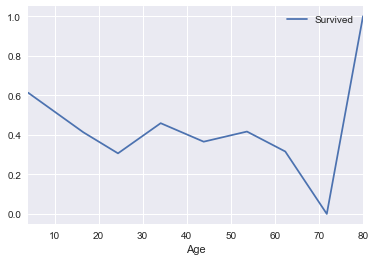

In [24]:
grouped_ages = df[['Age','Survived']].groupby(by=lambda index: int(df.loc[index]['Age']/10)).mean()
grouped_ages.plot(x='Age', y='Survived')

In [25]:
#Why the line goes up in 80 years? An outlier?
df[df['Age']>=80]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,estimated_age,cabin_letter,surname
PassengerId,,,,,,,,,,,,,,
631,80.0,A23,S,30.0,"Barkworth, Mr. Algernon Henry Wilson",0,1,male,0,1.0,27042,0,A,Barkworth


In most cases, the older the person the less probability of survival. So it's obvious this feature will be helpful for our ML model.

We could use this feature directly, or group by decades; as we don't know which one could be better, let's give both to the ML model.

We will save interesting features' names in a variable called _useful_.

In [26]:
df['decade'] = df['Age'].apply(lambda age: int(age/10))

# We will save useful features (column names) for later.
useful = ['Age', 'decade']

### 4.1.2 Fare

The first intuition is to think that cheapest tickets will be related with more deaths, but let's plot it.

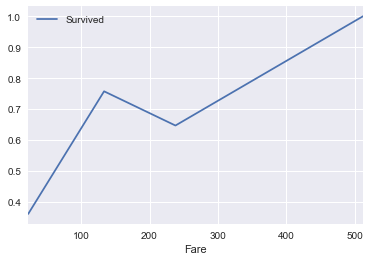

In [27]:
# Grouping by 100s
fare_grouped = df[['Fare', 'Survived']].groupby(by=lambda i: int(df.loc[i]['Fare']/100)).mean()
fare_grouped.plot(x='Fare', y='Survived')

It is clear that cheaper tickets will have less chance of survival. We can use this as input too.

In [28]:
useful.append('Fare')

### 4.1.3 SibSp (Sibblings + Spouses) and Parch (Parents + children)

Will having family of the similar age (sibblings + spouse) help? Let's find out!

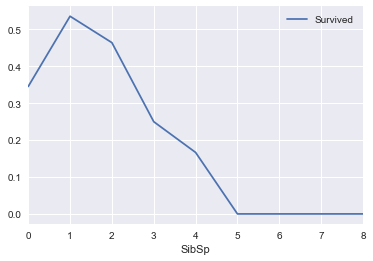

In [29]:
sibblings_grouped = df[['SibSp', 'Survived']].groupby('SibSp').mean()
sibblings_grouped.plot()

Being alone or having a big family seems a problem. Let's see the case with parents and children value.

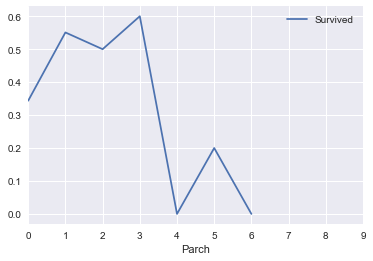

In [30]:
generations_grouped = df[['Parch', 'Survived']].groupby('Parch').mean()
generations_grouped.plot()

In this case, again being alone or being in a big family is a problem for your survival, but the correlation is not that clear.

We could reframe this information with new features: being alone and the size of the family.

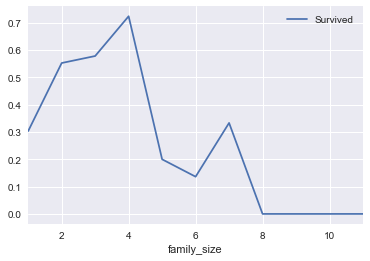

In [31]:
df['family_size'] = df['SibSp'] + df['Parch'] + 1

# Let's see if there is a clear limit
df[['family_size', 'Survived']].groupby('family_size').mean().plot()

Let's create new features for family sizes.

In [32]:
df['small_family'] = df['family_size'].apply(lambda size: 1 if size<=4 else 0)
df['big_family'] = df['family_size'].apply(lambda size: 1 if size>=7 else 0)
df['no_family'] = df['family_size'].apply(lambda s: 1 if s==1 else 0)

useful.extend(['SibSp', 'Parch', 'family_size', 'small_family', 'big_family', 'no_family'])

## 4.2 Categorical features

### 4.2.1 Sex

Let's see which sex has more chances of surviving.

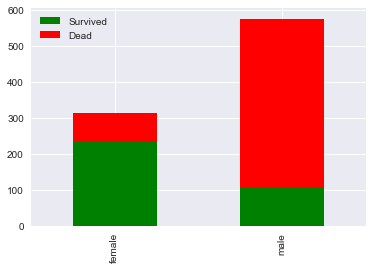

In [33]:
survived_sex = df[df['Survived']==1]['Sex'].value_counts()
survived_sex.name='Survived'
dead_sex = df[df['Survived']==0]['Sex'].value_counts()
dead_sex.name='Dead'

table = pd.DataFrame([survived_sex,dead_sex])

table.T.plot(kind='bar', stacked=True, color='gr')

It is clear that most females survived, while most men died. Let's encode it as values.

In [34]:
df['male'] = df['Sex'].map({'male': 1, 'female': 0})

useful.append('male')

### 4.2.2 Embarked

As we have seen while completing the missing values of this feature, there is some relation with the survival chances.

Let's see it again, but splitting by Pclass.

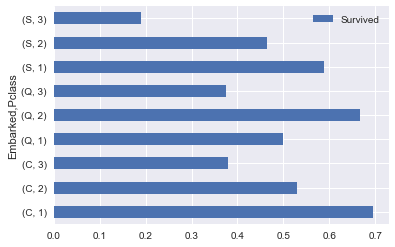

In [35]:
embarked_grouped = df[['Embarked', 'Pclass', 'Survived']].groupby(['Embarked','Pclass']).mean()
embarked_grouped.plot(kind='barh')

It's clear than there is differences, for instance with the second class of people embarked in Q. We need to encode this feature in multiple columns (one-hot encoding), that can be done with pandas get_dummies().

In [36]:
df = pd.concat([df, pd.get_dummies(df['Embarked'], prefix='embarked')], axis=1)

useful.extend(['embarked_{}'.format(x) for x in ['C', 'S', 'Q']])

#Let's see how these multiple columns look like
df.sample(5)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,...,surname,decade,family_size,small_family,big_family,no_family,male,embarked_C,embarked_Q,embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
187,22.00,NaN,Q,15.5000,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",0,3,female,1,1.0,...,O'Brien,2,2,1,0,0,0,0,1,0
1222,48.00,NaN,S,36.7500,"Davies, Mrs. John Morgan (Elizabeth Agnes Mary...",2,2,female,0,NaN,...,Davies,4,3,1,0,0,0,0,0,1
599,24.25,NaN,C,7.2250,"Boulos, Mr. Hanna",0,3,male,0,0.0,...,Boulos,2,1,1,0,1,1,1,0,0
1298,23.00,NaN,S,10.5000,"Ware, Mr. William Jeffery",0,2,male,1,NaN,...,Ware,2,2,1,0,0,1,0,0,1
699,49.00,C68,C,110.8833,"Thayer, Mr. John Borland",1,1,male,1,0.0,...,Thayer,4,3,1,0,0,1,1,0,0


### 4.2.3 Pclass

We have seen several times by now that there is a direct correlation between the class and the chance of survival. As this feature is already a number, we do not need to apply any process.

In [37]:
useful.append('Pclass')

## 4.3 Feature engineering with non-classifiable 

While doing feature completion we have already done some feature engineering that need further process: Cabin_letter (deck) and surname. Let's try out more ideas!

### 4.3.1 Cabin_letter

We just need to encode it in multiple columns.

In [38]:
df = pd.concat([df, pd.get_dummies(df['cabin_letter'], prefix='deck')], axis=1)

letters = df['cabin_letter'].unique()
useful.extend(['deck_{}'.format(x) for x in letters])

### 4.3.2 Ticket

#### 4.3.2.1 Sharing the Ticket

From previous exploration we noticed that a ticket can be shared among several passengers. Let's explore it a bit more.

In [39]:
ticket_count = df[['Ticket', 'Name']].groupby('Ticket').count().rename(columns={'Name':'count'}).sort_values(by='count', ascending=False)
ticket_count.head()

,count
Ticket,
CA. 2343,11
1601,8
CA 2144,8
3101295,7
347077,7


Several people have shared a ticket in some cases, which means that there were groups of friends or colleages that, despite they don't have family relation, we should consider them as a group. Let's verify if with ticket "1601".

In [40]:
df[df['Ticket']=='1601']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,...,embarked_S,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_N,deck_T
PassengerId,,,,,,,,,,,,,,,,,,,,,
75,32.0,NaN,S,56.4958,"Bing, Mr. Lee",0,3,male,0,1.0,...,1,0,0,0,0,0,0,0,1,0
170,28.0,NaN,S,56.4958,"Ling, Mr. Lee",0,3,male,0,0.0,...,1,0,0,0,0,0,0,0,1,0
510,26.0,NaN,S,56.4958,"Lang, Mr. Fang",0,3,male,0,1.0,...,1,0,0,0,0,0,0,0,1,0
644,25.0,NaN,S,56.4958,"Foo, Mr. Choong",0,3,male,0,1.0,...,1,0,0,0,0,0,0,0,1,0
693,25.0,NaN,S,56.4958,"Lam, Mr. Ali",0,3,male,0,1.0,...,1,0,0,0,0,0,0,0,1,0
827,25.0,NaN,S,56.4958,"Lam, Mr. Len",0,3,male,0,0.0,...,1,0,0,0,0,0,0,0,1,0
839,32.0,NaN,S,56.4958,"Chip, Mr. Chang",0,3,male,0,1.0,...,1,0,0,0,0,0,0,0,1,0
931,25.0,NaN,S,56.4958,"Hee, Mr. Ling",0,3,male,0,NaN,...,1,0,0,0,0,0,0,0,1,0


So our guess can be true. Among ticket '1601' there are people with similar names' origin, but no family indicators (both Parch and SibSp are zeros).

Wait a moment! If the ticket is shared, we should divide the Fare among the people who share the ticket. Let's add this new feature too.

In [41]:
df['ticket_owners'] = df['Ticket'].apply(lambda x: ticket_count.loc[x])
df['shared_fare'] = df['Fare'] / df['ticket_owners']

df['alone'] = df[['ticket_owners','no_family']].apply(lambda row: 1 if row.ticket_owners==1 and row.no_family==1 else 0 , axis=1)

useful.extend(['ticket_owners', 'shared_fare', 'alone'])

#### 4.3.2.2 Head of family/friends from Ticket

If the people sharing the ticket are family or friends, we could guess that the oldest of family's (the head of family) age can be relevant to the rest of the family/friends. Younger head of family could've helped better the rest of the group, for instance.

In [42]:
df['ticket_owners'].describe()

count    1309.000000
mean        2.101604
std         1.779832
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        11.000000
Name: ticket_owners, dtype: float64

The 50% percentile shows that more than half of passengers traveled without sharing ticket, which is not helping our guess. Let's follow with the calculation anyway.

In [43]:
older_age = df[['Ticket', 'Age']].groupby('Ticket').max()
df['older_relative_age'] = df['Ticket'].apply(lambda ticket: older_age.loc[ticket])

useful.extend(['older_relative_age'])

### 4.3.3 Name

A trivial feature could be the length of the name. Longer names tend to be from the royalty.

In [44]:
df['name_length'] = df.Name.apply(len)

useful.append('name_length')

#### 4.3.3.1 Language from Name

As Name field is text, we could try to get the language using _langid_ library. Perhaps people who spoke other languages except English had more problems to understand emergency directions.

In [45]:
import langid

df['lang'] = df['Name'].apply(lambda n: langid.classify(n)[0])
df[['Name','lang']].sample(10)

,Name,lang
PassengerId,,
7,"McCarthy, Mr. Timothy J",lt
898,"Connolly, Miss. Kate",en
792,"Gaskell, Mr. Alfred",en
259,"Ward, Miss. Anna",en
497,"Eustis, Miss. Elizabeth Mussey",es
794,"Hoyt, Mr. William Fisher",en
17,"Rice, Master. Eugene",de
129,"Peter, Miss. Anna",en
925,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",oc


Despite _langid_ did not a perfect job with just a few words to work with, we can get an idea about the language that each passenger could have used.

Let's explore the most common languages.

In [46]:
lang_count = df[['lang','Name']].groupby('lang').count().rename(columns={'Name':'count'})
lang_class = df[['lang','Pclass']].groupby('lang').mean()
lang_survived = df[['lang','Survived']].groupby('lang').mean()
pd.concat([lang_count, lang_class, lang_survived], axis=1).sort_values(by='count', ascending=False).head(15)

,count,Pclass,Survived
lang,,,
en,591,2.262267,0.381443
de,207,2.207729,0.392857
fr,71,2.014085,0.440000
es,62,2.193548,0.512195
et,43,2.813953,0.178571
it,40,2.450000,0.400000
da,35,2.285714,0.375000
sv,30,2.433333,0.500000
fi,28,2.642857,0.454545


English(en) and German(de) are the most common cases, with a survived ratio around 38%. Then we have languages that come from latin: French(fr), Spanish(es) and Italian(it) with a better ratio, around 40~50%, surprisingly. Moreover, looking at the mean Pclass, both groups have similar social status.

Funny enough, there are several cases labelled as Estonian(et), which could be an effect of _langid_ with short strings, but with a really bad survived ratio.

We may want to make groups, just to help the ML model. We will add some African and Asian languages as groups too, expecting .

In [47]:
language_groups = {
    'uk': ('cy', 'en'),
    'germanic': ('da', 'de', 'nl'),
    'latin': ('es', 'fr', 'it', 'la', 'pt', 'br', 'ro'),
    'african': ('af', 'rw', 'xh'),
    'asian': ('id', 'tl', 'tr')
}
language_map = { y:x for x in language_groups for y in language_groups[x]}    

df['lang_group'] = df['lang'].apply(lambda l: language_map[l] if l in language_map else 'other')
survived_avg_per_group = df[['lang_group','Survived']].groupby('lang_group').mean()
survived_std_per_group = df[['lang_group','Survived']].groupby('lang_group').std().rename(columns={'Survived':'std'})
pd.concat([survived_avg_per_group, survived_std_per_group], axis=1)

,Survived,std
lang_group,,
african,0.750000,0.500000
asian,0.416667,0.514929
germanic,0.383333,0.487555
latin,0.433824,0.497434
other,0.335329,0.473525
uk,0.382653,0.486656


In [48]:
df = pd.concat([df, pd.get_dummies(df['lang_group'], prefix='lang_group')], axis=1)

langs = df['lang_group'].unique()
useful.extend(['lang_group_{}'.format(x) for x in langs])

#### 4.3.3.2 Common surname

Let's guess that a common surname will not help the person, while a rare surname it's an indicator for a special person.

In [49]:
surnames = df[['surname', 'Name']].groupby('surname').count().rename(columns={'Name':'count'})
df['surname_count'] = df['surname'].apply(lambda x: surnames.loc[x])

useful.append('surname_count')

#### 4.3.3.3 Title from Name

Given that the Name has the format "Surname, Title. Name", let's extract the titles and group them.

In [50]:
df['title'] = df['Name'].apply(lambda n: n.split(',')[1].split('.')[0].strip())

title_mean = df[['title','Survived']].groupby('title').mean()
title_count = df[['title','Survived']].groupby('title').count().rename(columns={'Survived':'count'})
pd.concat([title_mean, title_count], axis=1).sort_values('Survived')

,Survived,count
title,,
Capt,0.000000,1
Don,0.000000,1
Jonkheer,0.000000,1
Rev,0.000000,6
Mr,0.156673,517
Dr,0.428571,7
Col,0.500000,2
Major,0.500000,2
Master,0.575000,40


Let's group these titles!

In [51]:
title_groups = {
    "Capt": "sacrifies",
    "Col": "sacrifies",
    "Rev": "sacrifies",
    "Major": "sacrifies",
    "Mr" : "Mr",
    "Master": "Master",
    "Miss": "Miss",
    "Mrs": "Mrs",
    "Mme": "Mrs",
    "Ms": "Mrs",
    "Mlle": "Miss"
}

df['title_group'] = df['title'].apply(lambda t: title_groups[t] if t in title_groups else 'other')

df = pd.concat([df, pd.get_dummies(df['title_group'], prefix='title_group')], axis=1)

t_g = df['title_group'].unique()
useful.extend(['title_group_{}'.format(x) for x in t_g])

## 4.4 Exploring which features are really useful

We have created missing values and new features freely. But in order to see which features could be more relevant to our model, we can explore their direct correlation with Survived. We can even train a Random Forest to get some insights too.

In [52]:
df.corr()['Survived'].sort_values()

title_group_Mr          -0.549199
male                    -0.543351
Pclass                  -0.338481
deck_N                  -0.331576
alone                   -0.235214
no_family               -0.203367
embarked_S              -0.149683
estimated_age           -0.121949
big_family              -0.078203
Age                     -0.058339
decade                  -0.050183
lang_group_other        -0.047906
title_group_sacrifies   -0.046444
SibSp                   -0.035322
deck_T                  -0.026456
surname_count           -0.025524
lang_group_uk           -0.002160
lang_group_germanic     -0.000523
embarked_Q               0.003650
lang_group_asian         0.007887
deck_G                   0.016040
family_size              0.016639
deck_A                   0.022287
title_group_other        0.027909
lang_group_latin         0.043623
lang_group_african       0.050561
ticket_owners            0.064962
deck_F                   0.067294
Parch                    0.081629
title_group_Ma

The correlation show us that being titled as Mr. is the biggest problem for a passenger (correlated -0.54). The second feature in importance is male sex (-0.54). Then title Mrs, Pclass, title Miss, etc.

Let's do a quick training with a Random Forest Classifier to compare feature importance. Firsly we should split out the train set from our complete dataframe.

In [53]:
train = df[df['Survived'].notnull()]
train_X = train[useful]
train_y = train['Survived']

We will run a quick try with Random Forest just to get an estimation of feature importance. This is useful to know, when further feature engineering is necesary, which cases are candidates to further analysis and engineering.

In [54]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=1)
clf = clf.fit(train_X, train_y)

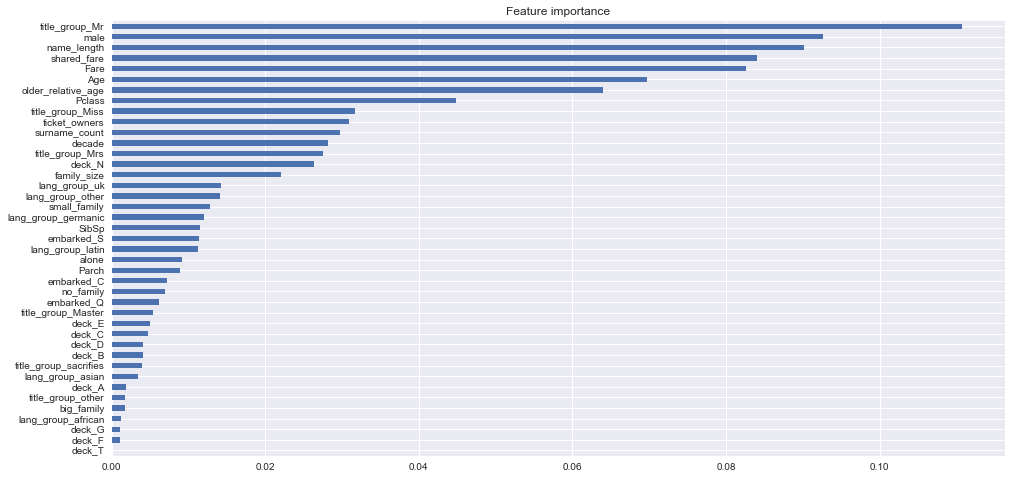

In [55]:
importances = pd.DataFrame(clf.feature_importances_, index=train_X.columns, columns=['importance']).sort_values(by='importance')
importances.plot.barh(figsize=(16,8), legend=None, title='Feature importance')

Some of our synthetic features are preforming well, and the same happens with Fare, Age and Pclass. We can explore the relations among top features, in order to see which ones can be candidates for refinement.

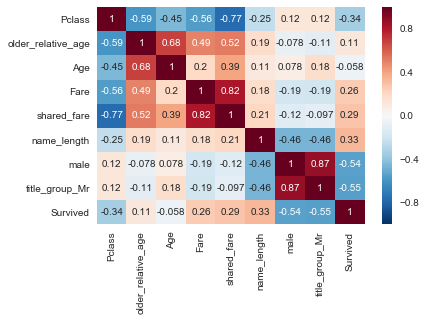

In [56]:
top_features = importances.tail(8).index.tolist()
top_features.append('Survived')
top_correlations = df[top_features].corr()

sns.heatmap(top_correlations, annot=True)

Clearly title_group_Mr and male are strongly correlated, so we could remove the second one. Same happens with shared_fare and Fare, and with Age and older_relative_age.

Let's choose only the most relevant features.

In [57]:
train_X.shape

(891, 41)

Given 891 passengers with 38 features in the train set...

In [58]:
useful = importances.tail(23).index.tolist()
useful.remove('male')
useful.remove('Fare')
useful.remove('older_relative_age')
train_X=train[useful]
train_X.shape

(891, 20)

We end with just 17 features.

# 5 Training a ML model

Now let's do a extend search for the best hyperparams that we will use in Random Forest. With GridSearchCV() we can try out different hyperparams for our model so automatically it will find the best combination. This will take a bit.

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

search=False #Set to True or False to search all combinations or use previous results
if search:
    parameter_grid = {
        'n_estimators': [10, 20, 50, 100, 200, 500],
        'learning_rate': [0.1, 0.2, 0.5, 1, 1.2],
        'random_state': [1]
    }
    model = AdaBoostClassifier()
    gs = GridSearchCV(
        model,
        scoring='accuracy',
        param_grid=parameter_grid,
        cv=2,
        n_jobs=-1)
    gs.fit(train_X, train_y)
    params = gs.best_params_
    print(params)
else:
    params = {
        'learning_rate': 0.2,
        'n_estimators': 20,
        'random_state': 1
    }

In [60]:
# Use the params to get a score with the training set
clf = AdaBoostClassifier(**params)
clf = clf.fit(train_X, train_y)
clf.score(train_X, train_y)

0.82154882154882158

# 6 Prediction

Finally, let's use the trained classifier to get predictions for the test dataset.

In [61]:
test = df[df['Survived'].isnull()]
test_X = test[useful]
test_y = clf.predict(test_X)

In [62]:
submit = pd.DataFrame(test_y.astype(int), index=test_X.index, columns=['Survived'])
submit.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [63]:
submit.to_csv('../output/submission.csv')

This submission scored 0.78468 in the competition.